<a href="https://colab.research.google.com/github/diegocp01/diegocp01-github.io/blob/main/Regression_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression model comparing ols and knn
# Apple Stock till 5/31/24

## Load and Preprocess the Data

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [3]:
df = pd.read_csv('/content/AAPL.csv')


In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-31,177.330002,179.350006,176.759995,177.250000,176.313629,99625300
1,2023-06-01,177.699997,180.119995,176.929993,180.089996,179.138626,68901800
2,2023-06-02,181.029999,181.779999,179.259995,180.949997,179.994080,61945900
3,2023-06-05,182.630005,184.949997,178.039993,179.580002,178.631317,121946500
4,2023-06-06,179.970001,180.119995,177.429993,179.210007,178.263290,64848400
...,...,...,...,...,...,...,...
248,2024-05-24,188.820007,190.580002,188.039993,189.979996,189.979996,36294600
249,2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100
250,2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000
251,2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49889100


### Check missing values EDA, correlations, plots and more----

## Prepare the Data for Modeling

In [15]:
# Selecting features and target variable
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202, 4), (51, 4), (202,), (51,))

## Build and Train the Models

### OLS


In [7]:
# Initialize and train the OLS regression model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Make predictions
y_pred_ols = ols_model.predict(X_test)

### KNN R

In [10]:

# Initialize and train the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

## Evaluate the Models

In [11]:
# Evaluate OLS model
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

# Evaluate KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'OLS Regression - MSE: {mse_ols}, R²: {r2_ols}')
print(f'KNN Regression - MSE: {mse_knn}, R²: {r2_knn}')

OLS Regression - MSE: 0.7720292538500014, R²: 0.9895994640579348
KNN Regression - MSE: 78.77356962273824, R²: -0.06121282070646239


## Visualize the Results

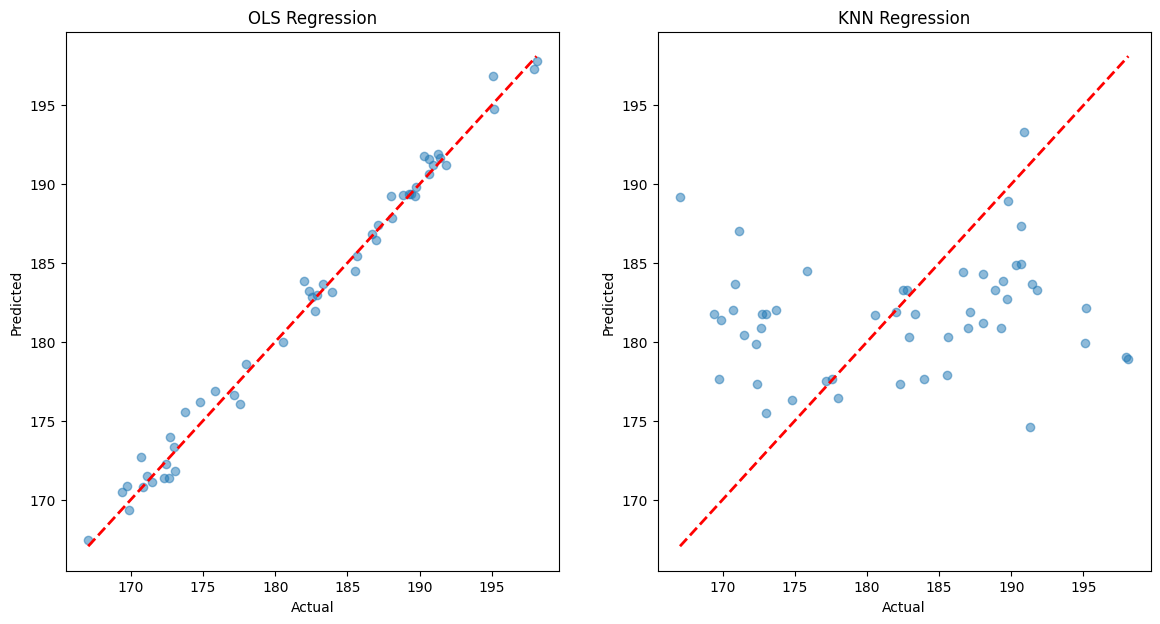

In [12]:
plt.figure(figsize=(14, 7))

# Plot OLS results
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ols, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('OLS Regression')

# Plot KNN results
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression')

plt.show()

## Analysis and Conclusion

#### OLS Regression
- **MSE**: 0.7720292538500014
- **R²**: 0.9895994640579348

#### KNN Regression
- **MSE**: 78.77356962273824
- **R²**: -0.06121282070646239

### Analysis
The OLS regression model significantly outperforms the KNN regression model based on the given metrics. The Mean Squared Error (MSE) for the OLS model is very low at approximately 0.77, indicating that the model's predictions are very close to the actual values. Additionally, the R-squared (R²) value for the OLS model is approximately 0.99, suggesting that the model explains almost all the variability in the target variable.

On the other hand, the KNN regression model has a very high MSE of approximately 78.77, indicating that the model's predictions are far from the actual values. Furthermore, the negative R-squared value (-0.06) indicates that the KNN model performs worse than a horizontal line (mean prediction), which is the lowest possible performance in regression tasks.

### Conclusion
Given the results, the OLS regression model is clearly the better choice for predicting the closing price of Apple stock in this dataset. The OLS model's near-perfect R² value and very low MSE demonstrate its superiority in capturing the linear relationships within the data.

### Reasons for OLS Superiority
- **Linear Relationship**: The OLS model assumes a linear relationship between the features and the target variable, which appears to be valid for this dataset. The stock prices may exhibit linear trends that the OLS model can effectively capture.
- **High Dimensionality and KNN**: KNN regression can struggle with high-dimensional data due to the curse of dimensionality. In this case, the four features used (Open, High, Low, Volume) might not provide a sufficiently clear pattern for KNN to perform well, especially without extensive tuning.

### Situations for Model Preference
- **OLS Preference**: In datasets where the relationship between features and target is approximately linear and the features are not too numerous, OLS regression will generally perform better.
- **KNN Preference**: KNN regression might be preferred in scenarios where the relationship between the features and the target variable is non-linear and there is sufficient data to capture the neighborhood effects. Extensive parameter tuning and feature scaling can also help improve KNN performance.

In conclusion, for the Apple stock dataset used in this analysis, the OLS regression model is unambiguously better. This is primarily due to the linear nature of the relationship between the features and the target variable, which the OLS model can effectively capture.

# Predictions (OLS)

In [14]:
# Hypothetical feature values for June 1, 2024
new_data = {
    'Open': [192.00],
    'High': [195.00],
    'Low': [190.00],
    'Volume': [50000000]
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data)

# Use the trained OLS model to predict the closing price
predicted_close_price = ols_model.predict(new_data_df)

print(f'The predicted closing price for June 1, 2024, is: {predicted_close_price[0]:.2f}')

The predicted closing price for June 1, 2024, is: 192.87


# The predicted closing price for June 1, 2024, is: 192.87